In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Creamos un filtro para obtener solo los datos de David Warner

In [3]:
filt=(df['batsman']=='DA Warner')
df_warner=df[filt]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_warner['dismissal_kind'].value_counts()


caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

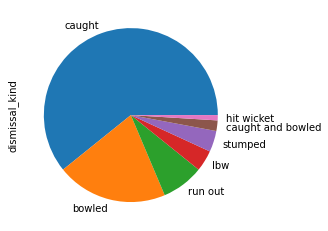

In [5]:
df_warner['dismissal_kind'].value_counts().plot.pie()
plt.savefig("./images/dimissal.png")

In [7]:
df_warner['batsman_runs'].value_counts()

0    1124
1     997
4     401
2     207
6     160
3      13
Name: batsman_runs, dtype: int64

¿Cuántos hay de valor 4?

In [10]:
len(df_warner[df_warner['batsman_runs']==4])

401

¿Cuántos hay de valor 6?

In [11]:
len(df_warner[df_warner['batsman_runs']==6])

160

Para calcular cualquier valor de los runs, hacemos una función.

In [12]:
def count_runs(df,runs):
    return (len(df_warner[df_warner['batsman_runs']==runs]))*runs
    

In [17]:
labels = [1,2,3,4,6]
slices = []
for run in labels:
    slices.append(count_runs(df_warner, run))
    

In [18]:
slices

[997, 414, 39, 1604, 960]

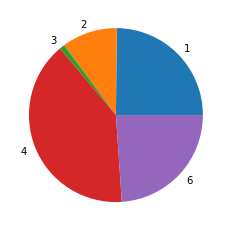

In [20]:
plt.pie(slices, labels = labels)
plt.savefig("./images/runs.png")

Pie en porcentajes

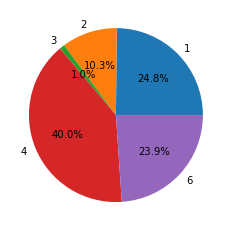

In [23]:
plt.pie(slices, labels = labels, autopct = '%1.1f%%')
plt.savefig("./images/runs_port.png")